<a href="https://colab.research.google.com/github/zlzonhenu/Machine-learning-basic/blob/master/sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

print('클래스 레이블: ', np.unique(y))

클래스 레이블:  [0 1 2]


70%는 훈련 데이터 30%는 테스트 데이터로 분할합니다.

In [0]:
from sklearn.model_selection import train_test_split
#stratify는 훈련세트와 테스트 세트의 레이블 비율을 입력 데이터셋과 동일하게 만든다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=1, stratify=y)

In [0]:
#np.bincount는 배열에 있는 고유한 값의 등장 횟수를 구한다.
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트: ', np.bincount(y_train))
print('y_test의 레이블 카운트: ', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트:  [35 35 35]
y_test의 레이블 카운트:  [15 15 15]


특성을 표준화합니다.

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#StandardScaler의 fit메서드는 훈련세트의 각 특성 차원마다 평균과 표준편차를 계산합니다.
sc.fit(X_train)
#transform메서드를 호출하면 계산된 평균과 표준편차로 표준화를 진행한다.
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## 사이킷런으로 퍼셉트론 훈련하기



In [0]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter = 40, eta0=0.1, tol=1e-3, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


In [0]:
from sklearn.metrics import accuracy_score

print('정확도: %.2f' % accuracy_score(y_test, y_pred))

정확도: 0.98


In [0]:
#이 메서드는 predict메서드와 accuracy_score메서드를 연결하여 정확도를 계산한다.
print('정확도:  %.2f' % ppn.score(X_test_std, y_test))

정확도:  0.98


In [0]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

표준화된 훈련 데이터를 사용하여 퍼셉트론 모델을 훈련한다.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


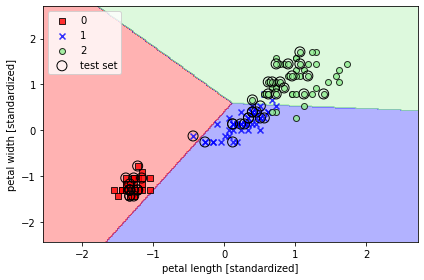

In [0]:
#np.vstack는 두 행렬을 수직으로 연결, np.hstack은 두 행렬을 수평으로 연결
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## 로지스틱 회귀 알고리즘

In [0]:
class LogisticRegressionGD(object):
  """경사 하강법을 사용한 로지스틱 회귀 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 로지스틱 비용 함수 값

    """
  def __init__(self, eta=0.05, n_iter=100, random_state=1):
      self.eta = eta
      self.n_iter = n_iter
      self.random_state = random_state

  def fit(self, X, y):
      """훈련 데이터 학습

      매개변수
      ----------
      X : {array-like}, shape = [n_samples, n_features]
        n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
      y : array-like, shape = [n_samples]
        타깃값

      반환값
      -------
      self : object

      """
      rgen = np.random.RandomState(self.random_state)
      self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
      self.cost_ = []

      for i in range(self.n_iter):
        net_input = self.net_input(X)
        output = self.activation(net_input)
        errors = (y - output)
        self.w_[1:] += self.eta * X.T.dot(errors)
        self.w_[0] += self.eta * errors.sum()

        #오차 제곱합 대신 로지스틱 비용을 계산합니다.
        cost = -y.dot(np.log(output)) - ((1-y).dot(np.log(1-output)))
        self.cost_.append(cost)
      return self

  def net_input(self, X):
      """최종 입력 계산"""
      return np.dot(X, self.w_[1:]) + self.w_[0] 

  def activation(self, z):
      """로지스틱 시그모이드 활성화 계산"""
      """np.clip(배열, 최소값 기준, 최대값 기준)은 이 범위 기준을 벗어나는 값에 대해서는 일괄적으로 최소값, 최대값으로 대치"""
      return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

  def predict(self, X):
      """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다."""
      return np.where(self.net_input(X) >= 0.0, 1, 0)
      #다음과 동일합니다.
      #return np.where(self.activation(self.net_input(X) >= 0.5, 1,0)) 

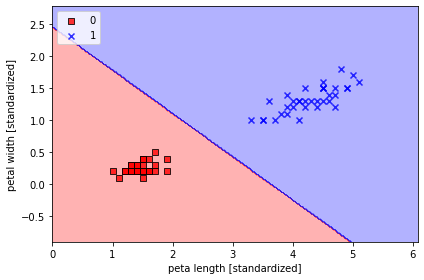

In [0]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('peta length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

사이킷런을 사용해 로지스틱 회귀 모델 훈련하기

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


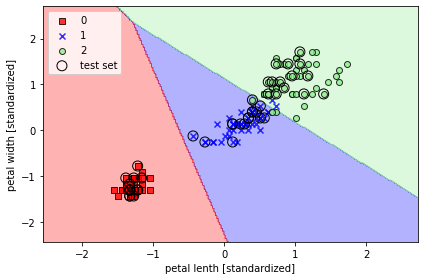

In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', multi_class='auto', C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105,150))
plt.xlabel('petal lenth [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [0]:
#세개의 샘플에 대해서 클래스 소속 확률을 나타냅니다.
lr.predict_proba(X_test_std[:3, :])


array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

In [0]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

# 규제를 사용해 과대적합 피하

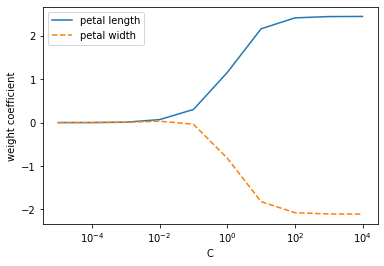

In [0]:
weights, params =[],[]
for c in np.arange(-5, 5):
  #C는 규제파라메타의 역수이므로 작을수록 규제강도가 증가
  lr = LogisticRegression(solver='liblinear', multi_class='auto', C=10.**c, random_state=1)
  lr.fit(X_train_std, y_train)
  #coef는 가중치, shape=(n_classes, n_features)
  #여기서는 클래스 1경우의 가중치만 생각합니다.
  weights.append(lr.coef_[1])
  params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:,1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()